In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
file = pd.read_csv('dataset.csv')

Data wrangling

In [2]:
# Checking the number of rows and columns in the dataset
file.shape

(266555, 13)

In [3]:
# Listing columns in a dataset
list(file.columns)

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [4]:
# Checking the data types of the data items
file.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
# Basic stats of the columns
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,266555.000000,266555.000000,266350.000000,266350.000000
mean,37.771374,-122.399625,37.771543,-122.399220
std,0.067145,0.085911,0.067098,0.085720
min,37.280000,-122.511286,37.280000,-122.511208
25%,37.768227,-122.430000,37.768227,-122.429148
50%,37.777413,-122.412083,37.777563,-122.411647
75%,37.790000,-122.398193,37.790000,-122.397086
max,37.880222,-121.810000,37.970000,-121.810000


In [6]:
# Checking for invalid data types
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266555 entries, 0 to 266554
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             266555 non-null  object 
 1   rideable_type       266555 non-null  object 
 2   started_at          266555 non-null  object 
 3   ended_at            266555 non-null  object 
 4   start_station_name  228908 non-null  object 
 5   start_station_id    228908 non-null  object 
 6   end_station_name    223234 non-null  object 
 7   end_station_id      223234 non-null  object 
 8   start_lat           266555 non-null  float64
 9   start_lng           266555 non-null  float64
 10  end_lat             266350 non-null  float64
 11  end_lng             266350 non-null  float64
 12  member_casual       266555 non-null  object 
dtypes: float64(4), object(9)
memory usage: 26.4+ MB


In [7]:
#Checking for missing values
data.isnull()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266550,False,False,False,False,False,False,True,True,False,False,False,False,False
266551,False,False,False,False,False,False,True,True,False,False,False,False,False
266552,False,False,False,False,False,False,True,True,False,False,False,False,False
266553,False,False,False,False,False,False,True,True,False,False,False,False,False


In [8]:
# Count the missing values
file.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    37647
start_station_id      37647
end_station_name      43321
end_station_id        43321
start_lat                 0
start_lng                 0
end_lat                 205
end_lng                 205
member_casual             0
dtype: int64

In [9]:
# Connverting starting and ending date to date time
file['started_at'] = pd.to_datetime(file['started_at'])
file['ended_at'] = pd.to_datetime(file['ended_at'])
file

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,385A70F0B05C2A80,classic_bike,2022-08-26 14:33:14,2022-08-26 14:37:43,Telegraph Ave at 27th St,OK-I5,Grand Ave at Webster St,OK-J6-1,37.816073,-122.267886,37.811377,-122.265192,casual
1,E70C368ED007F90B,classic_bike,2022-08-02 14:39:43,2022-08-02 14:59:32,62nd St at Claremont Ave,OK-A4,Webster St at 19th St,OK-K6,37.849435,-122.252541,37.806970,-122.266588,member
2,D5EBB3BC7A23E90F,classic_bike,2022-08-27 12:40:45,2022-08-27 12:48:02,Page St at Masonic Ave,SF-K16,Sanchez St at 15th St,SF-M20,37.771155,-122.445907,37.766219,-122.431060,casual
3,1D29D0A0045F4554,classic_bike,2022-08-29 17:49:52,2022-08-29 17:53:15,3rd St at Townsend St,SF-J29-1,2nd St at Townsend St,SF-I30,37.778588,-122.392553,37.780526,-122.390288,member
4,A74D99648323C88E,classic_bike,2022-08-17 21:16:12,2022-08-17 21:28:52,Washington St at Van Ness Ave,SF-E22,Father Alfred E Boeddeker Park,SF-H25,37.792980,-122.423302,37.784078,-122.411926,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266550,DA19B1398B36B2CD,electric_bike,2022-08-10 16:48:09,2022-08-10 17:26:25,Pierce St at Haight St,SF-K20,NaN,NaN,37.771865,-122.433841,37.760000,-122.410000,casual
266551,FB770934E82B2876,electric_bike,2022-08-09 22:05:15,2022-08-09 22:23:06,Grove St at Divisadero,SF-J18,NaN,NaN,37.775988,-122.437763,37.760000,-122.450000,casual
266552,5375756882C0FE38,electric_bike,2022-08-10 18:51:56,2022-08-10 18:55:32,Grove St at Divisadero,SF-J18,NaN,NaN,37.775984,-122.437617,37.780000,-122.440000,member
266553,28C4F040EFD11049,electric_bike,2022-08-11 08:36:22,2022-08-11 09:06:58,Pierce St at Haight St,SF-K20,NaN,NaN,37.771980,-122.433737,37.770000,-122.490000,casual


In [10]:
#  Noting the starting hour
file['hour'] = file.started_at.dt.hour.astype(str)
file

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour
0,385A70F0B05C2A80,classic_bike,2022-08-26 14:33:14,2022-08-26 14:37:43,Telegraph Ave at 27th St,OK-I5,Grand Ave at Webster St,OK-J6-1,37.816073,-122.267886,37.811377,-122.265192,casual,14
1,E70C368ED007F90B,classic_bike,2022-08-02 14:39:43,2022-08-02 14:59:32,62nd St at Claremont Ave,OK-A4,Webster St at 19th St,OK-K6,37.849435,-122.252541,37.806970,-122.266588,member,14
2,D5EBB3BC7A23E90F,classic_bike,2022-08-27 12:40:45,2022-08-27 12:48:02,Page St at Masonic Ave,SF-K16,Sanchez St at 15th St,SF-M20,37.771155,-122.445907,37.766219,-122.431060,casual,12
3,1D29D0A0045F4554,classic_bike,2022-08-29 17:49:52,2022-08-29 17:53:15,3rd St at Townsend St,SF-J29-1,2nd St at Townsend St,SF-I30,37.778588,-122.392553,37.780526,-122.390288,member,17
4,A74D99648323C88E,classic_bike,2022-08-17 21:16:12,2022-08-17 21:28:52,Washington St at Van Ness Ave,SF-E22,Father Alfred E Boeddeker Park,SF-H25,37.792980,-122.423302,37.784078,-122.411926,casual,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266550,DA19B1398B36B2CD,electric_bike,2022-08-10 16:48:09,2022-08-10 17:26:25,Pierce St at Haight St,SF-K20,NaN,NaN,37.771865,-122.433841,37.760000,-122.410000,casual,16
266551,FB770934E82B2876,electric_bike,2022-08-09 22:05:15,2022-08-09 22:23:06,Grove St at Divisadero,SF-J18,NaN,NaN,37.775988,-122.437763,37.760000,-122.450000,casual,22
266552,5375756882C0FE38,electric_bike,2022-08-10 18:51:56,2022-08-10 18:55:32,Grove St at Divisadero,SF-J18,NaN,NaN,37.775984,-122.437617,37.780000,-122.440000,member,18
266553,28C4F040EFD11049,electric_bike,2022-08-11 08:36:22,2022-08-11 09:06:58,Pierce St at Haight St,SF-K20,NaN,NaN,37.771980,-122.433737,37.770000,-122.490000,casual,8


In [11]:
# calculating time taken for each ride
file['duration'] = file['ended_at'] - file['started_at']
file

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,duration
0,385A70F0B05C2A80,classic_bike,2022-08-26 14:33:14,2022-08-26 14:37:43,Telegraph Ave at 27th St,OK-I5,Grand Ave at Webster St,OK-J6-1,37.816073,-122.267886,37.811377,-122.265192,casual,14,0 days 00:04:29
1,E70C368ED007F90B,classic_bike,2022-08-02 14:39:43,2022-08-02 14:59:32,62nd St at Claremont Ave,OK-A4,Webster St at 19th St,OK-K6,37.849435,-122.252541,37.806970,-122.266588,member,14,0 days 00:19:49
2,D5EBB3BC7A23E90F,classic_bike,2022-08-27 12:40:45,2022-08-27 12:48:02,Page St at Masonic Ave,SF-K16,Sanchez St at 15th St,SF-M20,37.771155,-122.445907,37.766219,-122.431060,casual,12,0 days 00:07:17
3,1D29D0A0045F4554,classic_bike,2022-08-29 17:49:52,2022-08-29 17:53:15,3rd St at Townsend St,SF-J29-1,2nd St at Townsend St,SF-I30,37.778588,-122.392553,37.780526,-122.390288,member,17,0 days 00:03:23
4,A74D99648323C88E,classic_bike,2022-08-17 21:16:12,2022-08-17 21:28:52,Washington St at Van Ness Ave,SF-E22,Father Alfred E Boeddeker Park,SF-H25,37.792980,-122.423302,37.784078,-122.411926,casual,21,0 days 00:12:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266550,DA19B1398B36B2CD,electric_bike,2022-08-10 16:48:09,2022-08-10 17:26:25,Pierce St at Haight St,SF-K20,NaN,NaN,37.771865,-122.433841,37.760000,-122.410000,casual,16,0 days 00:38:16
266551,FB770934E82B2876,electric_bike,2022-08-09 22:05:15,2022-08-09 22:23:06,Grove St at Divisadero,SF-J18,NaN,NaN,37.775988,-122.437763,37.760000,-122.450000,casual,22,0 days 00:17:51
266552,5375756882C0FE38,electric_bike,2022-08-10 18:51:56,2022-08-10 18:55:32,Grove St at Divisadero,SF-J18,NaN,NaN,37.775984,-122.437617,37.780000,-122.440000,member,18,0 days 00:03:36
266553,28C4F040EFD11049,electric_bike,2022-08-11 08:36:22,2022-08-11 09:06:58,Pierce St at Haight St,SF-K20,NaN,NaN,37.771980,-122.433737,37.770000,-122.490000,casual,8,0 days 00:30:36


In [12]:
# Getting days of the week
file['dayofweek'] = file.started_at.dt.strftime('%a')
file

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,duration,dayofweek
0,385A70F0B05C2A80,classic_bike,2022-08-26 14:33:14,2022-08-26 14:37:43,Telegraph Ave at 27th St,OK-I5,Grand Ave at Webster St,OK-J6-1,37.816073,-122.267886,37.811377,-122.265192,casual,14,0 days 00:04:29,Fri
1,E70C368ED007F90B,classic_bike,2022-08-02 14:39:43,2022-08-02 14:59:32,62nd St at Claremont Ave,OK-A4,Webster St at 19th St,OK-K6,37.849435,-122.252541,37.806970,-122.266588,member,14,0 days 00:19:49,Tue
2,D5EBB3BC7A23E90F,classic_bike,2022-08-27 12:40:45,2022-08-27 12:48:02,Page St at Masonic Ave,SF-K16,Sanchez St at 15th St,SF-M20,37.771155,-122.445907,37.766219,-122.431060,casual,12,0 days 00:07:17,Sat
3,1D29D0A0045F4554,classic_bike,2022-08-29 17:49:52,2022-08-29 17:53:15,3rd St at Townsend St,SF-J29-1,2nd St at Townsend St,SF-I30,37.778588,-122.392553,37.780526,-122.390288,member,17,0 days 00:03:23,Mon
4,A74D99648323C88E,classic_bike,2022-08-17 21:16:12,2022-08-17 21:28:52,Washington St at Van Ness Ave,SF-E22,Father Alfred E Boeddeker Park,SF-H25,37.792980,-122.423302,37.784078,-122.411926,casual,21,0 days 00:12:40,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266550,DA19B1398B36B2CD,electric_bike,2022-08-10 16:48:09,2022-08-10 17:26:25,Pierce St at Haight St,SF-K20,NaN,NaN,37.771865,-122.433841,37.760000,-122.410000,casual,16,0 days 00:38:16,Wed
266551,FB770934E82B2876,electric_bike,2022-08-09 22:05:15,2022-08-09 22:23:06,Grove St at Divisadero,SF-J18,NaN,NaN,37.775988,-122.437763,37.760000,-122.450000,casual,22,0 days 00:17:51,Tue
266552,5375756882C0FE38,electric_bike,2022-08-10 18:51:56,2022-08-10 18:55:32,Grove St at Divisadero,SF-J18,NaN,NaN,37.775984,-122.437617,37.780000,-122.440000,member,18,0 days 00:03:36,Wed
266553,28C4F040EFD11049,electric_bike,2022-08-11 08:36:22,2022-08-11 09:06:58,Pierce St at Haight St,SF-K20,NaN,NaN,37.771980,-122.433737,37.770000,-122.490000,casual,8,0 days 00:30:36,Thu


In [13]:
# Checking the days of the week in the dataset
file.dayofweek.unique()

array(['Fri', 'Tue', 'Sat', 'Mon', 'Wed', 'Sun', 'Thu'], dtype=object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266555 entries, 0 to 266554
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             266555 non-null  object         
 1   rideable_type       266555 non-null  object         
 2   started_at          266555 non-null  datetime64[ns] 
 3   ended_at            266555 non-null  datetime64[ns] 
 4   start_station_name  228908 non-null  object         
 5   start_station_id    228908 non-null  object         
 6   end_station_name    223234 non-null  object         
 7   end_station_id      223234 non-null  object         
 8   start_lat           266555 non-null  float64        
 9   start_lng           266555 non-null  float64        
 10  end_lat             266350 non-null  float64        
 11  end_lng             266350 non-null  float64        
 12  member_casual       266555 non-null  object         
 13  hour          

In [15]:
# Dropping missing values
df = file.dropna()
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,duration,dayofweek
0,385A70F0B05C2A80,classic_bike,2022-08-26 14:33:14,2022-08-26 14:37:43,Telegraph Ave at 27th St,OK-I5,Grand Ave at Webster St,OK-J6-1,37.816073,-122.267886,37.811377,-122.265192,casual,14,0 days 00:04:29,Fri
1,E70C368ED007F90B,classic_bike,2022-08-02 14:39:43,2022-08-02 14:59:32,62nd St at Claremont Ave,OK-A4,Webster St at 19th St,OK-K6,37.849435,-122.252541,37.806970,-122.266588,member,14,0 days 00:19:49,Tue
2,D5EBB3BC7A23E90F,classic_bike,2022-08-27 12:40:45,2022-08-27 12:48:02,Page St at Masonic Ave,SF-K16,Sanchez St at 15th St,SF-M20,37.771155,-122.445907,37.766219,-122.431060,casual,12,0 days 00:07:17,Sat
3,1D29D0A0045F4554,classic_bike,2022-08-29 17:49:52,2022-08-29 17:53:15,3rd St at Townsend St,SF-J29-1,2nd St at Townsend St,SF-I30,37.778588,-122.392553,37.780526,-122.390288,member,17,0 days 00:03:23,Mon
4,A74D99648323C88E,classic_bike,2022-08-17 21:16:12,2022-08-17 21:28:52,Washington St at Van Ness Ave,SF-E22,Father Alfred E Boeddeker Park,SF-H25,37.792980,-122.423302,37.784078,-122.411926,casual,21,0 days 00:12:40,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266210,69053F5B32B4AE29,classic_bike,2022-08-03 17:49:36,2022-08-03 18:06:31,19th Street BART Station,OK-K5-2,Lakeshore Ave at Trestle Glen Rd,OK-H9-2,37.809369,-122.267951,37.811081,-122.243268,member,17,0 days 00:16:55,Wed
266283,8283AA6FE75EB499,classic_bike,2022-08-09 16:22:07,2022-08-09 16:32:06,Bay Pl at Vernon St,OK-I6,Lakeshore Ave at Trestle Glen Rd,OK-H9-2,37.811483,-122.260506,37.811081,-122.243268,member,16,0 days 00:09:59,Tue
266301,09203C7D8D56208D,classic_bike,2022-08-08 18:08:00,2022-08-08 18:20:04,Shattuck Ave at Telegraph Ave,OK-E4,Telegraph Ave at 23rd St,OK-J5,37.833279,-122.263490,37.812678,-122.268773,member,18,0 days 00:12:04,Mon
266342,845601B9AF730FE2,classic_bike,2022-08-25 11:02:22,2022-08-25 11:08:13,Frank H Ogawa Plaza,OK-L5,23rd St at Telegraph Ave,OK-J5,37.804562,-122.271738,37.812581,-122.268573,member,11,0 days 00:05:51,Thu


In [16]:
# Checking for the sum of missing values again
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
hour                  0
duration              0
dayofweek             0
dtype: int64

In [17]:
# Checking for duplicates
sum(df.duplicated())

0

In [18]:
# Desciptive statistics
df.describe()

,start_lat,start_lng,end_lat,end_lng,duration
count,202323.000000,202323.000000,202323.000000,202323.000000,202323
mean,37.772051,-122.393746,37.772210,-122.393289,0 days 00:14:28.883947944
std,0.069348,0.088270,0.069326,0.088083,0 days 00:30:18.315844236
min,37.308938,-122.511286,37.309014,-122.511208,0 days 00:00:00
25%,37.768592,-122.426497,37.768545,-122.425786,0 days 00:05:56
50%,37.777375,-122.410964,37.777547,-122.410048,0 days 00:09:57
75%,37.789764,-122.394908,37.790296,-122.394880,0 days 00:16:02
max,37.880222,-121.863649,37.880222,-121.863649,1 days 00:57:54


In [19]:
# Checking for the invalid data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202323 entries, 0 to 266343
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             202323 non-null  object         
 1   rideable_type       202323 non-null  object         
 2   started_at          202323 non-null  datetime64[ns] 
 3   ended_at            202323 non-null  datetime64[ns] 
 4   start_station_name  202323 non-null  object         
 5   start_station_id    202323 non-null  object         
 6   end_station_name    202323 non-null  object         
 7   end_station_id      202323 non-null  object         
 8   start_lat           202323 non-null  float64        
 9   start_lng           202323 non-null  float64        
 10  end_lat             202323 non-null  float64        
 11  end_lng             202323 non-null  float64        
 12  member_casual       202323 non-null  object         
 13  hour          

In [20]:
df.head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,duration,dayofweek
0,385A70F0B05C2A80,classic_bike,2022-08-26 14:33:14,2022-08-26 14:37:43,Telegraph Ave at 27th St,OK-I5,Grand Ave at Webster St,OK-J6-1,37.816073,-122.267886,37.811377,-122.265192,casual,14,0 days 00:04:29,Fri
1,E70C368ED007F90B,classic_bike,2022-08-02 14:39:43,2022-08-02 14:59:32,62nd St at Claremont Ave,OK-A4,Webster St at 19th St,OK-K6,37.849435,-122.252541,37.806970,-122.266588,member,14,0 days 00:19:49,Tue
2,D5EBB3BC7A23E90F,classic_bike,2022-08-27 12:40:45,2022-08-27 12:48:02,Page St at Masonic Ave,SF-K16,Sanchez St at 15th St,SF-M20,37.771155,-122.445907,37.766219,-122.431060,casual,12,0 days 00:07:17,Sat
3,1D29D0A0045F4554,classic_bike,2022-08-29 17:49:52,2022-08-29 17:53:15,3rd St at Townsend St,SF-J29-1,2nd St at Townsend St,SF-I30,37.778588,-122.392553,37.780526,-122.390288,member,17,0 days 00:03:23,Mon
4,A74D99648323C88E,classic_bike,2022-08-17 21:16:12,2022-08-17 21:28:52,Washington St at Van Ness Ave,SF-E22,Father Alfred E Boeddeker Park,SF-H25,37.792980,-122.423302,37.784078,-122.411926,casual,21,0 days 00:12:40,Wed
5,EBD391851FCD24E6,electric_bike,2022-08-16 07:40:20,2022-08-16 07:58:59,Spruce St at California St,SF-F15,Yerba Buena Center for the Arts (Howard St at ...,SF-H27-1,37.786607,-122.453369,37.784872,-122.400876,casual,7,0 days 00:18:39,Tue
6,E8B71A8F4E58046B,electric_bike,2022-08-23 18:50:26,2022-08-23 18:57:34,Page St at Masonic Ave,SF-K16,Market St at Franklin St,SF-K22-1,37.771144,-122.445737,37.773793,-122.421239,member,18,0 days 00:07:08,Tue
7,F4B7560CE07365D5,classic_bike,2022-08-19 19:50:50,2022-08-19 20:01:05,MacArthur BART Station,OK-F4,Broadway at 30th St,OK-H5,37.828595,-122.266349,37.819381,-122.261928,member,19,0 days 00:10:15,Fri
8,777C6B146F2FDD3E,classic_bike,2022-08-21 23:23:57,2022-08-21 23:34:02,The Embarcadero at Steuart St,SF-F30-1,Howard St at 6th St,SF-I26-,37.791401,-122.391038,37.780265,-122.406644,casual,23,0 days 00:10:05,Sun
9,8A8193AD61F1B6F9,electric_bike,2022-08-09 20:07:31,2022-08-09 20:15:04,4th St at Mission Bay Blvd S,SF-L30-1,Pier 1/2 at The Embarcadero,SF-D29,37.770283,-122.391234,37.796389,-122.394586,casual,20,0 days 00:07:33,Tue


In [21]:
# Deleting unwanted columns
df.drop(columns=["ride_id", "started_at", "ended_at", ], inplace=True)

C:\Users\knaka.DESKTOP-0Q9HUV9\AppData\Local\Temp\ipykernel_8952\3332054753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["ride_id", "started_at", "ended_at", ], inplace=True)


In [22]:
# What is the frequently used bike type?
df['rideable_type'].value_counts().reset_index().sort_values(by="rideable_type").iloc[-1]['index']

'electric_bike'

In [23]:
# Are members more than casual or?
df['member_casual'].value_counts()

member    121753
casual     80570
Name: member_casual, dtype: int64

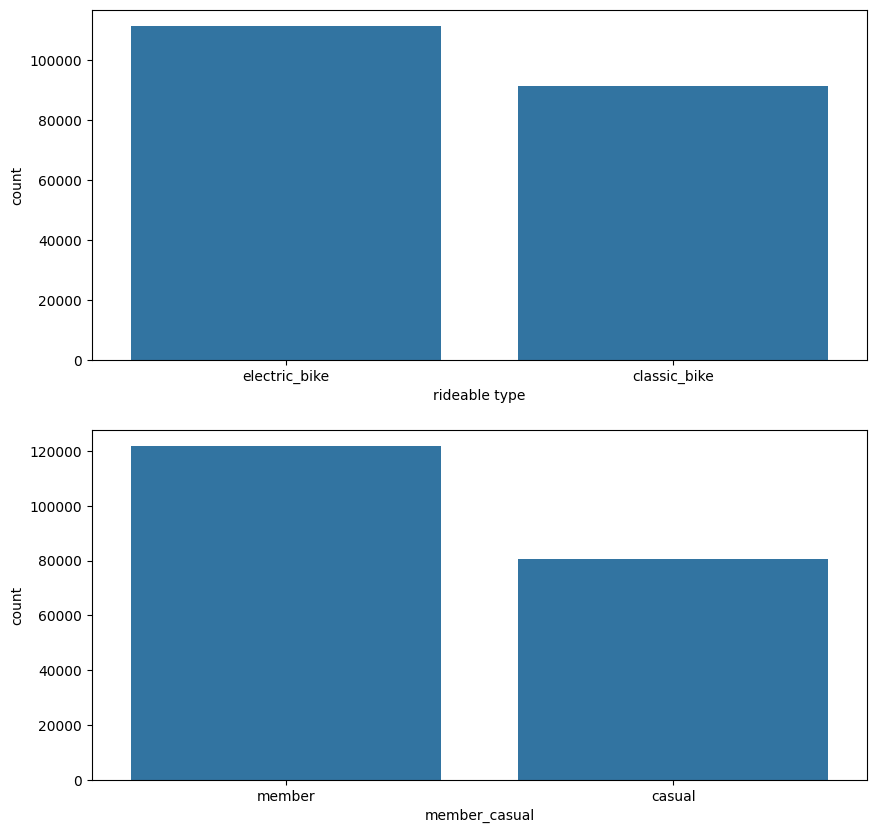

In [39]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'rideable_type', color=default_color, order=df.rideable_type.value_counts().index, ax = ax[0])
sns.countplot(data = df, x = 'member_casual', color=default_color,order=df.member_casual.value_counts().index,  ax = ax[1])
ax[0].set_xlabel('rideable type')
ax[1].set_xlabel('member_casual')
plt.show()

In [25]:
# What's the frequently used start station?
df['start_station_name'].value_counts().reset_index().sort_values(by="start_station_name").iloc[-1]['index']

'Market St at 10th St'

In [26]:
# What's the frequently used end station?
df["end_station_name"].value_counts().reset_index().sort_values(by="end_station_name").iloc[-1]["index"]

'Market St at Steuart St'

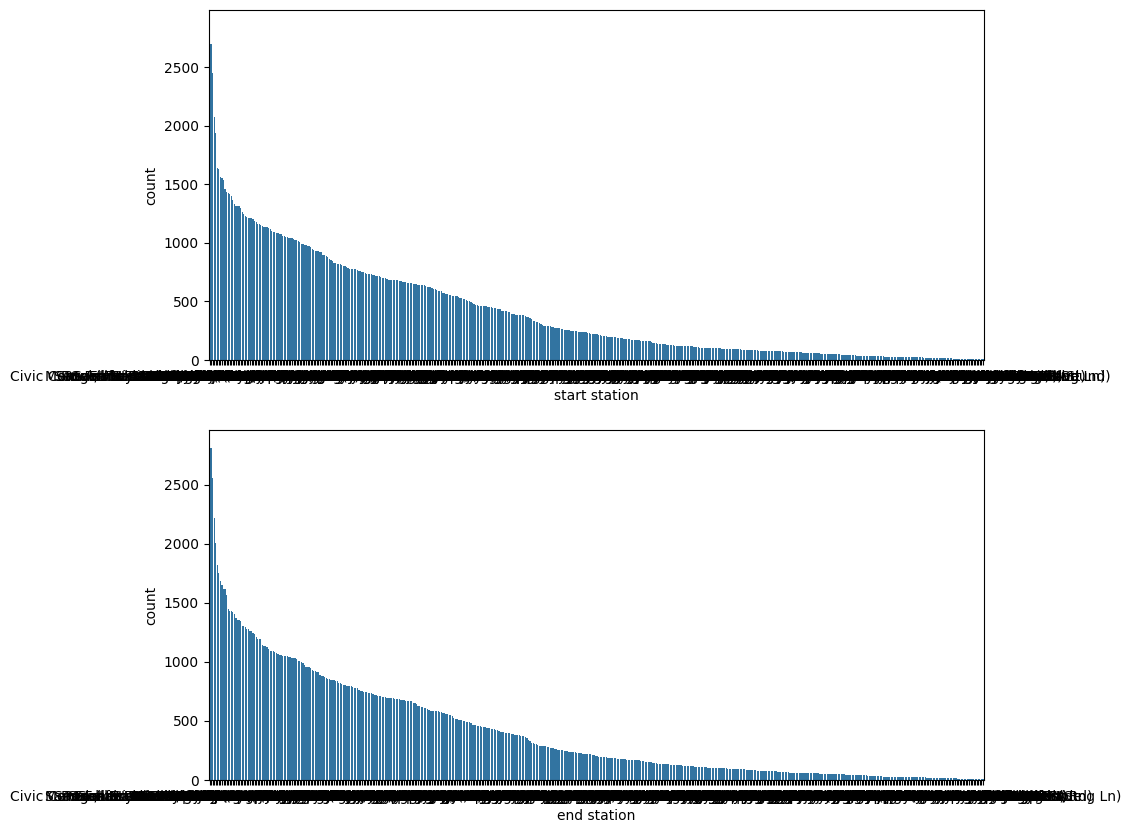

In [27]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'start_station_name', color=default_color, order=df.start_station_name.value_counts().index, ax = ax[0])
sns.countplot(data = df, x = 'end_station_name', color=default_color,order=df.end_station_name.value_counts().index,  ax = ax[1])
ax[0].set_xlabel('start station')
ax[1].set_xlabel('end station')
plt.show()

In [32]:
# What is the busiest hour of the day?
df["hour"].value_counts().reset_index().sort_values(by="hour").iloc[-1]["index"]

'17'

In [30]:
# What's the busiest day of the week
df["dayofweek"].value_counts().reset_index().sort_values(by="dayofweek").iloc[-1]["index"]

'Wed'

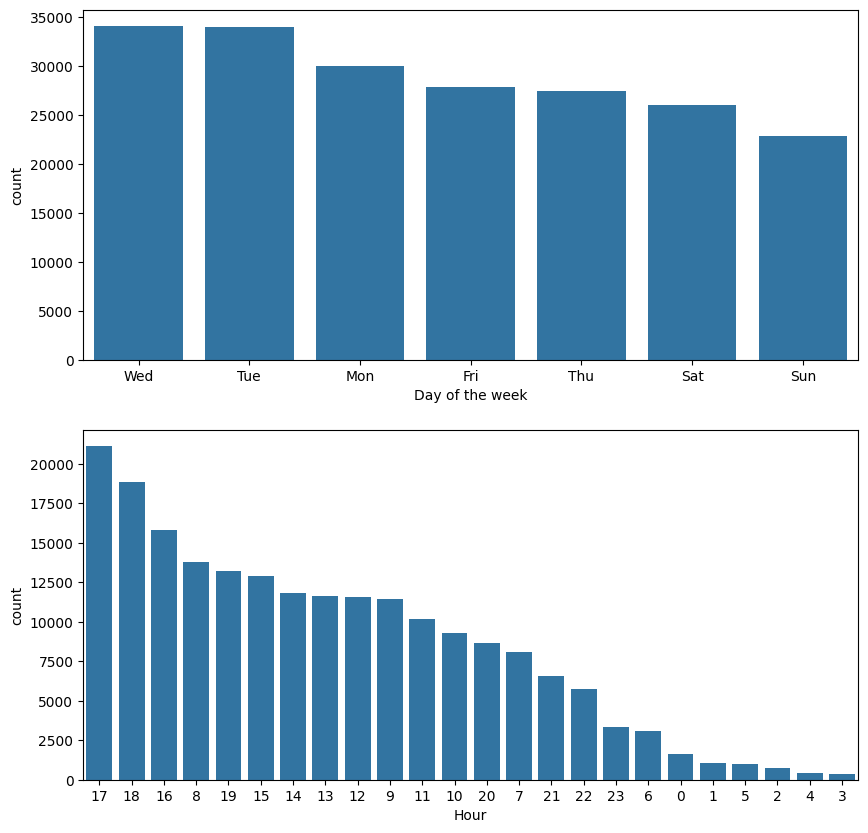

In [31]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'dayofweek', color=default_color, order=df.dayofweek.value_counts().index, ax = ax[0])
sns.countplot(data = df, x = 'hour', color=default_color,order=df.hour.value_counts().index,  ax = ax[1])
ax[0].set_xlabel('Day of the week')
ax[1].set_xlabel('Hour')
plt.show()

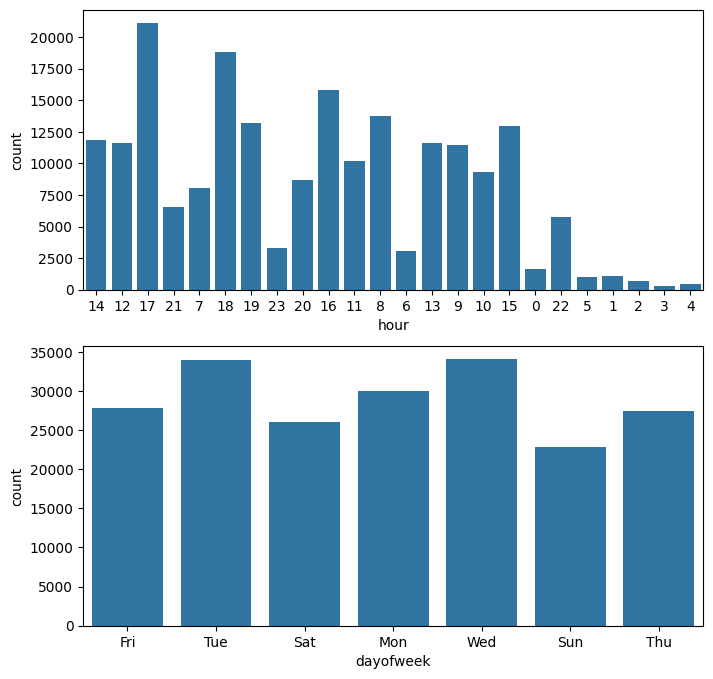

In [43]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'hour', color=default_color, ax=ax[0])
sns.countplot(data = df, x = 'dayofweek', color=default_color, ax=ax[1])
plt.show()

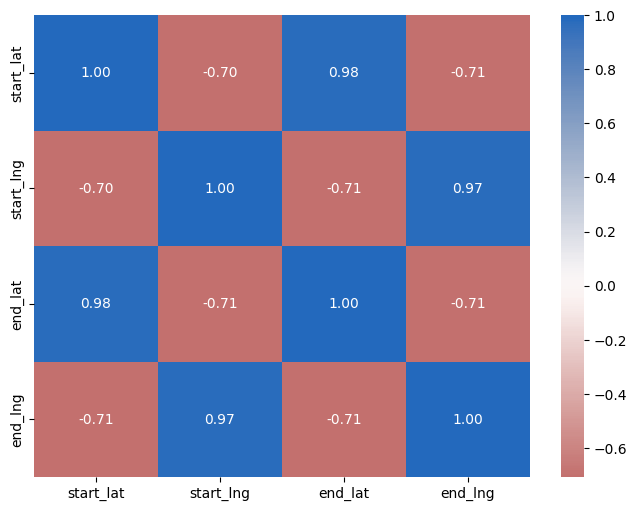

In [44]:
# Correlation of all numerical values
all_numeric_vars = ['duration', 'start_lat','start_lng', \
                   'end_lat', 'end_lng','hour' ]
key_numeric_vars = ['duration','hour']
# correlation plot 
plt.figure(figsize=[8,6])
sns.heatmap(df[all_numeric_vars].corr(), annot=True, fmt='.2f',cmap='vlag_r', center=0 )
plt.show()

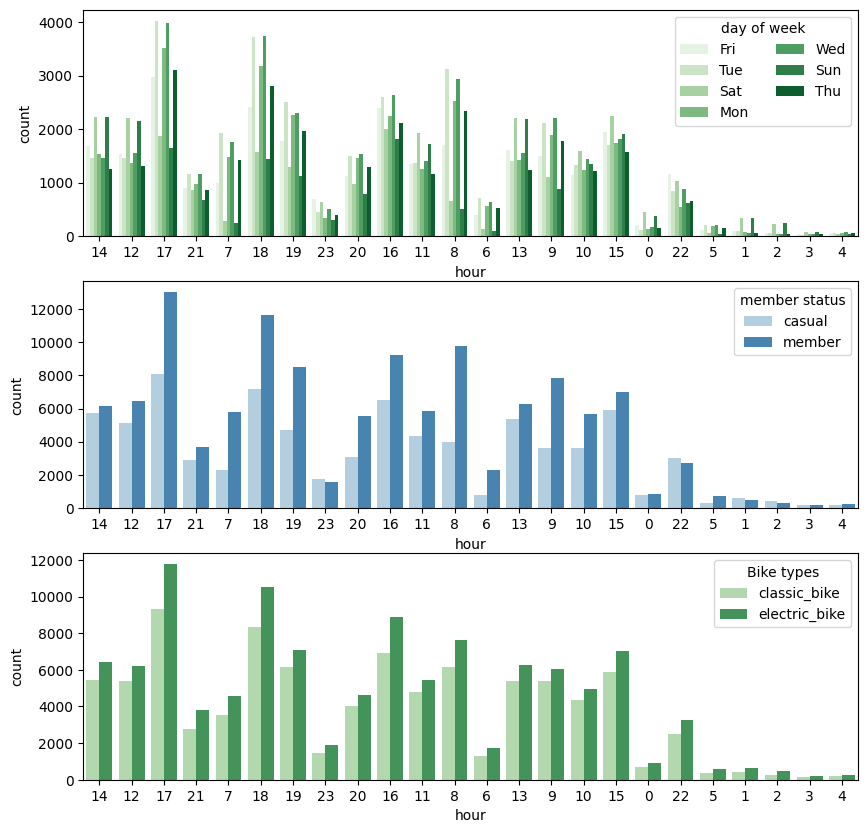

In [60]:
# looking at key categorical features 
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.countplot(data=df, x='hour', hue='dayofweek', palette='Greens', ax=ax[0])
ax[0].legend(title='day of week', ncol=2)
sns.countplot(data=df, x='hour', hue='member_casual', palette='Blues', ax=ax[1])
ax[1].legend(title='member status')
sns.countplot(data=df, x='hour', hue='rideable_type', palette='Greens', ax=ax[2])
ax[2].legend(title='Bike types')
plt.show()

Observation

Tuesday, 5 PM and 8 AM has the highest bike trips across 7 days and 24 hours.

Overall, weekdays have higher number of trips than weekends except two time frames:
10 AM — 3 PM (the usual office hours) in which both have approx. same number of trips.
12 midnight to 2 AM in which weekends have more trips than weekdays.

Overall, members have higher number of trips than casual across all times of the day. 
Moreover, 8 AM and 5 PM has the most ‘member’ bikers compared to other hours. 
Also, 5 PM has the momembers have higher number of trips than casuals across all days of the week. 

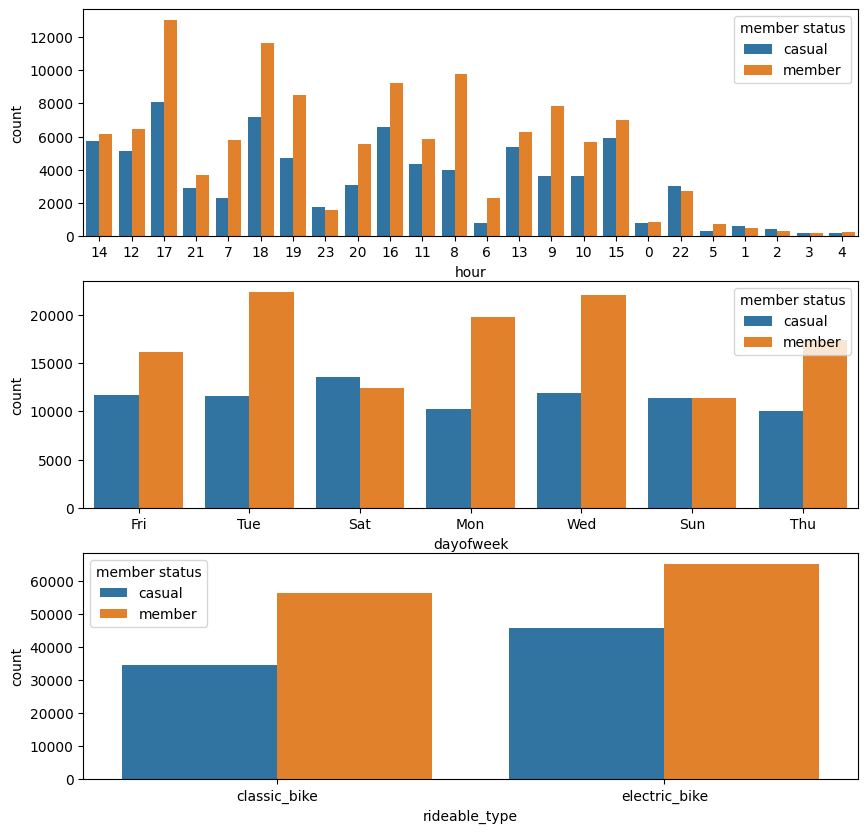

In [61]:
# including other categorical features such as gender 
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sns.countplot(data=df, x='hour', hue='member_casual', palette='tab10', ax=ax[0])
ax[0].legend(title='member status')
sns.countplot(data=df, x='dayofweek', hue='member_casual', palette='tab10', ax=ax[1])
ax[1].legend(title='member status')
sns.countplot(data=df, x='rideable_type', hue='member_casual', palette='tab10', ax=ax[2])
ax[2].legend(title='member status')
plt.show()

Observation

Overall, members bikers have higher number of trips as compared to casual and other types across all the times of the day (hour) and days of the week.

Most of the electric and classic bikers are members.

5 pm and 6 PM has the highest member bikers across 24 hours

Tuesday has the most member bikers compared to other days.

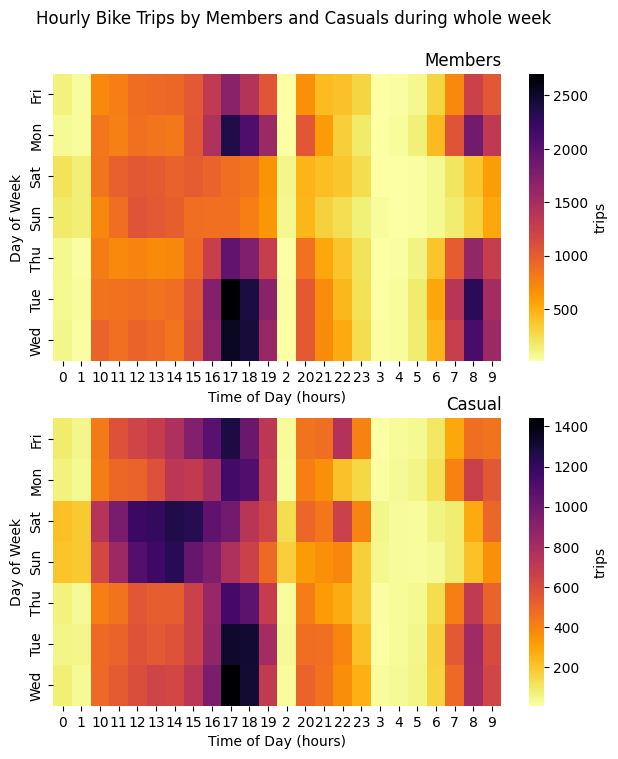

In [77]:
fig, ax = plt.subplots(nrows=2, figsize=[8,8])

fig.suptitle('Hourly Bike Trips by Members and Casuals during whole week')

member = df.query('member_casual == "member"')
ct_counts = member.groupby(['dayofweek', 'hour']).size()
ct_counts = ct_counts.reset_index(name='trips')
ct_counts = ct_counts.pivot(index='dayofweek', columns=['hour'], values='trips')
sns.heatmap(data=ct_counts, fmt='.0f',cmap='inferno_r', cbar_kws={'label':'trips'}, ax=ax[0])
ax[0].set_title('Members', loc='right')
ax[0].set_xlabel('Time of Day (hours)')
ax[0].set_ylabel('Day of Week')


casual = df.query('member_casual == "casual"')
sb_counts = casual.groupby(['dayofweek', 'hour']).size()
sb_counts = sb_counts.reset_index(name='trips')
sb_counts = sb_counts.pivot(index='dayofweek', columns=['hour'], values='trips')
sns.heatmap(data=sb_counts, fmt='.0f', cmap='inferno_r', cbar_kws={'label':'trips'}, ax=ax[1])
ax[1].set_title('Casual', loc='right')
ax[1].set_xlabel('Time of Day (hours)')
ax[1].set_ylabel('Day of Week')
#adjusting figure main title
fig.subplots_adjust(top =0.90, left=0.20)
plt.show()

Observation

The heatmaps show clearly a very different usage pattern between the two type of bike riders.

Members use the bike sharing system heavily on work days i.e. 
Monday through Friday whereas casuals ride a lot on weekends i.e. 
Saturday and Sunday, especially in the afternoon. 

Many trips are concentrated around 8-9 AM and 4-6 PM on work days for members who probably use the system for work commute, yet casual tend to use more in the late afternoon around 5 PM on weekdays (Monday to Friday). 

Other than usage purpose and habit, traffic situation around these rush hours in the area may also have an influence in this trend.